In [9]:
import openpyxl
import numpy as np

In [10]:
workbook = openpyxl.load_workbook('DataRegression.xlsx')
sheets = ['Var01', 'Var11', 'Var16']
values = {}

for sheet_name in sheets:
    sheet = workbook[sheet_name]
    values[f'{sheet_name}_x'] = []
    values[f'{sheet_name}_y'] = []
    
    for row in sheet.iter_rows(values_only=True):
        y, x = row
        if x != 'x' or y != 'y':
            values[f'{sheet_name}_x'].append(x)
            values[f'{sheet_name}_y'].append(y)

for key, value in values.items():
    print(key, value)

Var01_x [77.6, 114.9, 141.1, 190.8, 239.9, 289, 332.8, 378.4, 434.8, 477.3, 536.8, 593.1, 689.1, 760]
Var01_y [10.07, 14.73, 17.94, 23.93, 29.61, 35.18, 40.02, 44.82, 50.76, 55.05, 61.01, 66.4, 75.47, 81.78]
Var11_x [77.6, 114.9, 141.1, 190.8, 239.9, 289, 332.8, 378.4, 434.8, 477.3, 536.8, 593.1, 689.1, 760]
Var11_y [10.07, 14.73, 17.94, 23.93, 29.61, 35.18, 40.02, 44.82, 50.76, 55.05, 61.01, 66.4, 75.47, 81.78]
Var16_x [400, 405, 410, 415, 420, 425, 430, 435, 436.5, 438, 439.5, 441, 442.5, 444, 445.5, 447, 448.5, 450, 451.5, 453, 454.5, 456, 457.5, 459, 460.5, 462, 463.5, 465, 470, 475, 480, 485, 490, 495, 500]
Var16_y [0.0001575, 0.0001699, 0.000235, 0.0003102, 0.0004917, 0.000871, 0.0017418, 0.00464, 0.0065895, 0.0097302, 0.0149002, 0.023731, 0.0401683, 0.0712559, 0.1264458, 0.2073413, 0.2902366, 0.3445623, 0.3698049, 0.3668534, 0.3106727, 0.2078154, 0.1164354, 0.0616764, 0.03372, 0.0194023, 0.0117831, 0.0074357, 0.0022732, 0.00088, 0.0004579, 0.0002345, 0.0001586, 0.0001143, 7.1e-0

In [12]:
values['Var01_x']

[77.6,
 114.9,
 141.1,
 190.8,
 239.9,
 289,
 332.8,
 378.4,
 434.8,
 477.3,
 536.8,
 593.1,
 689.1,
 760]

In [27]:
import numpy as np

class DifferentialEvolution:
    def __init__(self, bounds, x, y, pop_size=50, mutation=0.8, crossover=0.7, max_iter=1000, tol=1e-6):
        self.bounds = bounds
        self.x = x
        self.y = y
        self.pop_size = pop_size
        self.mutation = mutation
        self.crossover = crossover
        self.max_iter = max_iter
        self.tol = tol
        self.param = {'fit': []}

    def func(self, x, b1, b2):
        return b1 * (1 - np.exp(-b2 * x))

    def optimize(self):
        num_params = len(self.bounds)
        pop = np.random.rand(self.pop_size, num_params)
        min_b, max_b = np.asarray(self.bounds).T
        diff = np.fabs(min_b - max_b)
        pop_denorm = min_b + pop * diff

        fitness = np.asarray([np.mean((self.func(self.x, *ind) - self.y) ** 2) for ind in pop_denorm])
        best_idx = np.argmin(fitness)
        best_params = pop_denorm[best_idx]
        for _ in range(self.max_iter):
            for j in range(self.pop_size):
                idxs = [idx for idx in range(self.pop_size) if idx != j]
                a, b, c = pop[np.random.choice(idxs, 3, replace=False)]
                mutant = np.clip(a + self.mutation * (b - c), 0, 1)
                cross_points = np.random.rand(num_params) < self.crossover
                if not np.any(cross_points):
                    cross_points[np.random.randint(0, num_params)] = True
                trial = np.where(cross_points, mutant, pop[j])
                trial_denorm = min_b + trial * diff
                f = np.mean((self.func(self.x, *trial_denorm) - self.y) ** 2)
                if f < fitness[j]:
                    fitness[j] = f
                    pop[j] = trial
                    if f < fitness[best_idx]:
                        best_idx = j
                        best_params = trial_denorm
            self.param['fit'].append(fitness.copy())
            if np.std(fitness) < self.tol:
                break
        best_fitness = np.mean((self.func(self.x, *best_params) - self.y) ** 2)
        return best_params, best_fitness

bounds = [(0, 100), (0, 1),]
x = np.array([77.6, 114.9, 141.1, 190.8, 239.9, 289, 332.8, 378.4, 434.8, 477.3, 536.8, 593.1, 689.1, 760])
y = np.array([10.07, 14.73, 17.94, 23.93, 29.61, 35.18, 40.02, 44.82, 50.76, 55.05, 61.01, 66.4, 75.47, 81.78])

de = DifferentialEvolution(bounds, x, y)
best_params, best_fitness = de.optimize()
print("Найкращі параметри b1 та b2:", best_params)
print("Значення фітнес функції:", best_fitness)

Найкращі параметри b1 та b2: [1.00000000e+02 1.70090026e-03]
Значення фітнес функції: 16.060409281688777


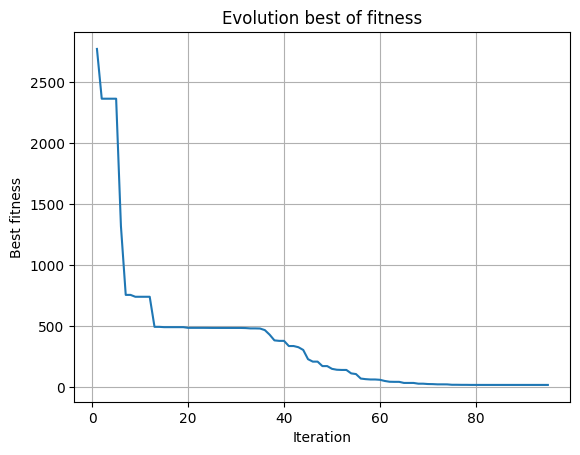

In [29]:
import matplotlib.pyplot as plt
def distance(data):
    fitness = data['fit']
    best_fitness = [max(iteration) for iteration in fitness]
    plt.plot(range(1, len(best_fitness) + 1), best_fitness)
    plt.xlabel('Iteration')
    plt.ylabel('Best fitness')
    plt.title('Evolution best of fitness')
    plt.grid(True)
    plt.show()

distance(de.param)

In [59]:
import numpy as np

class ParticleSwarmOptimization:
    def __init__(self, func, bounds, x, y, num_particles=50, max_iter=1000, tol=1e-6):
        self.func = func
        self.bounds = bounds
        self.x = x
        self.y = y
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.tol = tol
        self.param = {'fit': []}

    def optimize(self):
        num_params = len(self.bounds)
        min_bound, max_bound = np.asarray(self.bounds).T
        bounds_diff = np.fabs(min_bound - max_bound)

        # Ініціалізація рою частинок
        particles = np.random.rand(self.num_particles, num_params) * bounds_diff + min_bound
        velocities = np.zeros((self.num_particles, num_params))
        best_particle_pos = particles.copy()
        best_swarm_pos = None
        best_swarm_val = np.inf

        for _ in range(self.max_iter):
            for j in range(self.num_particles):
                val = self.func(self.x, *particles[j])
                if val < best_swarm_val:
                    best_swarm_val = val
                    best_swarm_pos = particles[j].copy()
            # Оновлення швидкостей та позицій частинок
            r1, r2 = np.random.rand(2, num_params)
            velocities = velocities + (r1 * (best_particle_pos - particles) +
                                       r2 * (best_swarm_pos - particles))
            particles = particles + velocities

            # Обмеження позицій частинок в межах
            particles = np.clip(particles, min_bound, max_bound)
            
            self.param['fit'].append([best_swarm_val])

            # Критерій зупинки
            if np.std(best_particle_pos) < self.tol:
                break

        return best_swarm_pos, best_swarm_val

    @staticmethod
    def regression_func(x, b1, b2):
        return np.mean((b1 * (1 - np.exp(-b2 * x)) - y) ** 2)

bounds = [(0, 100), (0, 1)]
x = np.array([77.6, 114.9, 141.1, 190.8, 239.9, 289, 332.8, 378.4, 434.8, 477.3, 536.8, 593.1, 689.1, 760])
y = np.array([10.07, 14.73, 17.94, 23.93, 29.61, 35.18, 40.02, 44.82, 50.76, 55.05, 61.01, 66.4, 75.47, 81.78])

pso = ParticleSwarmOptimization(ParticleSwarmOptimization.regression_func, bounds, x, y)
best_params, best_fitness = pso.optimize()
print("Найкращі параметри b1 та b2:", best_params)
print("Значення функції в найкращій точці:", best_fitness)


Найкращі параметри b1 та b2: [1.00000000e+02 1.69659931e-03]
Значення функції в найкращій точці: 16.066564634168735


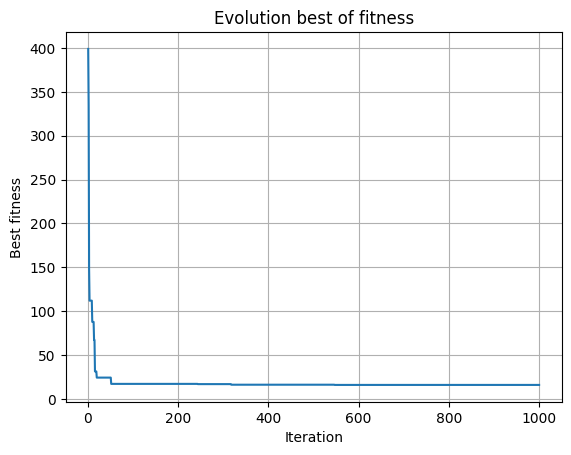

In [61]:
distance(pso.param)